<a href="https://colab.research.google.com/github/blacktruth513/Attention-Mechanism_based_Machine-Translation_Project/blob/main/English_Chinese_Machine_Translation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# 개인 프로젝트 2 

---

#<center> **<Attention NLP 모델 기반 중문-영문 기계어 번역 프로젝트>** </center>

---
<br>

##- 프로젝트 순서 -  
<br>

1.  프로젝트 주제 및 목적  
<br>

2. 프로젝트 문제 정의  
<br>

3. 데이터 선정 이유 및 소개 
<br> 
<br>

4. 데이터 전처리 
<br>

5. 모델링 
<br>

6. 모델 테스트 및 평가
<br>

7. 프로젝트 결론 및 향후 개선점 
<br>

8. 참고 문헌





# 1 프로젝트 주제 및 목적

## 1-1 프로젝트 주제

- 주제 : 어텐션 메커니즘을 적용한 seq2seq nlp 모델 기반 중문-영문 기계어 번역 프로젝트

##1-2 프로젝트 목적


- 두 언어 (입력 언어 : 중국어, 타겟 언어 : 영어) 간 기계어 번역 모델을 구축하고 결과를 도출함으로써, 언어 모델에 대한 심화된 이해력을 갖추고 더 나아가, 딥러닝 분야에서의 딥러닝 기술 활용 역량 강화를 목표로 한다.

# 2 프로젝트 문제 정의

- 프로젝트 가설 : 주어진 데이터의 입력 언어를 언어 모델 학습을 통해 대응되는 타겟 언어로 기계 번역한다.
<br>
<br>
- 프로젝트 예상 결과 : 딥러닝 모델링을 통해 성능 지표를 확보하여 중문 데이터를 영문 데이터로 기계 번역하고, 테스트 데이터에 모델을 적용하여 모델의 성능을 테스트한다.    

# 3 데이터 선정 이유 및 소개


 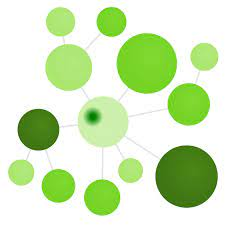

 - Tatoeba Project 출처 데이터로서, 중국어-영어 번역(병렬) 코퍼스(말뭉치) 형태로 26388개의 데이터로 구성되어 있다. 기계어 번역을 수행하는 본 프로젝트에 데이터로 사용하기에 적절하다고 판단해 해당 데이터를 사용하여 프로젝트를 수행했다. 
<br>
<br>

- 참고) Tatoeba Project 목표 : 언어 학습 응용 프로그램을 개발하는 모든 사람이 사용할 수 있는 문장 및 번역 데이터베이스를 만드는 것을 목표로 한다. 프로젝트 아이디어는 해당 프로젝트가 언어 관련 데이터를 생성하므로 프로그래머는 응용 프로그램 코딩에만 집중할 수 있도록 함에 있다.
 (데이터 출처 : http://www.manythings.org/anki/)

## 3-1 데이터 미리 보기

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# 중문 간자체 패키지
# !pip install OpenCC

In [ ]:
import os
import io
import time
import pandas as pd
import numpy as np

# 전처리 라이브러리
import re
from opencc import OpenCC
import jieba
import unicodedata

# 모델링 라이브러리
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
import pandas as pd
with open('/content/drive/MyDrive/AI_Bootcamp/Project2_Data/new_df.txt', mode='r', encoding='utf-8') as f:
    en_zh = f.read().strip().split('\n')

en_zh = pd.read_table('/content/drive/MyDrive/AI_Bootcamp/Project2_Data/new_df.txt', sep='\t', header=None)

en_zh.columns = ['en', 'zh', 'source']
zh_en = en_zh[['zh', 'en']]

In [ ]:
# 데이터 내 번체자 >> 간체자로 전환
zh_en.head(50)

,zh,en
0,他这么说就是为了开玩笑。,He said it merely as a joke.
1,我不知道你不喜欢汤姆的理由。,I don't know why you don't like Tom.
2,这正是我需要的东西。,This is exactly what I need.
3,探头配有麦克风。,The probe is equipped with a microphone.
4,我今年没时间去度假。,I don't have time for a vacation this year.
5,你擅長說哪種語言？,What languages are you good at speaking?
6,你做什么工作？,What is your occupation?
7,我收集郵票。,I collect stamps.
8,把你们的帽子摘下来。,Take your hats off.
9,我可以去洗手間嗎？,May I go to the bathroom?


In [ ]:
zh_en.tail(50)

,zh,en
26338,保镖戴着耳机。,The bodyguard was wearing an earpiece.
26339,我刚才在家。,I was at home.
26340,他英文得到了九十分。,He got 90% in English.
26341,我大学里的第一天相当没意思。,My first day in the university was rather boring.
26342,各位，請安靜。,"Everyone, please be quiet."
26343,我們把牛奶製成乳酪和奶油。,We make milk into cheese and butter.
26344,我不能喝牛奶。,I can't drink milk.
26345,我今天没时间冲澡。,I didn't have time to take a shower today.
26346,你们这些人帮不了自己。,You people can't help yourselves.
26347,停止大声说话。,Stop talking loudly.


# 4 데이터 전처리

- 4-1) 중문 데이터 간자체 적용 : 데이터에 번체자-간체자 혼용으로 같은 단어가 다른 단어로 인식될 경우를 방지 
- 4-2) 데이터 기본 전처리 : 단어 분철 / 영문 데이터 소문자 형태로 변환 / 기본 부호 
- 4-3) 모델링 적용을 위한 토크나이징 및 텍스트 데이터 벡터화

##4-1 중문 데이터 간자체 적용

In [ ]:
# 데이터 주소 경로
path_to_file = '/content/drive/MyDrive/AI_Bootcamp/Project2_Data/new_df.txt'

In [ ]:
# 간자체 변환 인스턴스 생성
cc = OpenCC('t2s')

##4-2 데이터 기본 전처리

- 단어 분철 / 영문 데이터 소문자 형태로 변환 / 기본 부호 처리

In [ ]:
# 문서 전처리 함수
def preprocess_sentence(w):
    # 영문 
    w = w.lower().strip()
    # 중문 번체 > 간체
    w = cc.convert(w)  
    w = w.rstrip().strip()
    # 분철
    w = ' '.join(jieba.lcut(w))
    w = re.sub(r'[" "]+', " ", w)
    # 단위 문서 구분
    w = '<start> ' + w + ' <end>'
    return w

### 예시 문장 전처리 상태 확인

In [ ]:
en_sentence = u"Please be ready in fifteen minutes."
cn_sentence = u"瑪麗很容易發脾氣。"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(cn_sentence))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.868 seconds.
Prefix dict has been built successfully.


<start> please be ready in fifteen minutes . <end>
<start> 玛丽 很 容易 发脾气 。 <end>


### 전처리 완료된 데이터셋 구축

In [ ]:
# 데이터 전처리 완료 및 정제된 문서 파일 반환 / [ENGLISH, CHINESE]
def create_dataset(path):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')[:2]]  for l in lines]

    return zip(*word_pairs)

In [ ]:
en, cn = create_dataset(path_to_file)

### 전처리 데이터 예시 확인

In [ ]:
print(cn[26356])
print(en[26356])
print()
print(cn[34])
print(en[34])

<start> 他 给 了 我 任何 我 需要 的 帮助 。 <end>
<start> he gave me whatever help i needed . <end>

<start> 我 没有 和 她 相处 过 。 <end>
<start> i didn ' t get along with her . <end>


##4-3 모델링 적용을 위한 텍스트 데이터 벡터화

In [ ]:
# 문서 최대 길이 확인 함수
def max_length(tensor):
    return max(len(t) for t in tensor)

### 문서 토크나이징 및 텍스트 벡터화

In [ ]:
# 토크나이징 함수
def tokenizing(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

  return tensor, lang_tokenizer

###토크나이저 함수 데이터 적용

- 입력 언어 데이터(중문) 및 출력 언어 데이터(영문)에 토크나이징 적용

In [ ]:
# 토크나이징 데이터 적용 함수 (입력 언어 : 중문, 타겟 언어 : 영문)
def load_dataset(path):
    
    target_lang, input_lang = create_dataset(path)

    input_tensor, input_lang_tokenizer = tokenizing(input_lang)
    target_tensor, target_lang_tokenizer = tokenizing(target_lang)

    return input_tensor, target_tensor, input_lang_tokenizer, target_lang_tokenizer

In [ ]:
# 토크나이징 함수 적용
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file)

# 타겟변수 문서 최대 길이 출력
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

###문서 최대 길이 확인

In [ ]:
print("중문 최대 문서 길이:", max_length_inp) 
print("영문 최대 문서 길이:", max_length_targ)

중문 최대 문서 길이: 32
영문 최대 문서 길이: 40


#5 모델링

## 5-1 모델링 준비

### 데이터셋 분할

In [ ]:
# 데이터셋 분할 (학습/테스트 - 9:1)
input_tensor_train, input_tensor_test, target_tensor_train, target_tensor_test = train_test_split(input_tensor, target_tensor, test_size=0.1) 

In [ ]:
print(input_tensor_train.shape, input_tensor_test.shape) # 중문 데이터

(23749, 32) (2639, 32)


In [ ]:
print(target_tensor_train.shape, target_tensor_test.shape) # 영문 데이터

(23749, 40) (2639, 40)


### 데이터 단어 id 맵핑 확인

In [ ]:
# 데이터 id 맵핑 확인
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [ ]:
# 학습 데이터 
print("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[18888])
print()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[18888])

Input Language; index to word mapping
1 ----> <start>
752 ----> 抓住
8 ----> 他
3 ----> 。
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
566 ----> catch
52 ----> him
3 ----> .
2 ----> <end>


In [ ]:
# 테스트 데이터 
print("Input Language; index to word mapping")
convert(inp_lang, input_tensor_test[1770])
print()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_test[1770])

Input Language; index to word mapping
1 ----> <start>
28 ----> 一个
1122 ----> 外国
380 ----> 语言
172 ----> 无法
11 ----> 在
783 ----> 一年
915 ----> 左右
41 ----> 就
58 ----> 被
2460 ----> 掌握
3 ----> 。
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
9 ----> a
753 ----> foreign
470 ----> language
34 ----> can
5 ----> '
13 ----> t
40 ----> be
3760 ----> mastered
15 ----> in
9 ----> a
204 ----> year
180 ----> or
106 ----> so
3 ----> .
2 ----> <end>


### tf.data 데이터셋 생성하기

-  tf.data API를 사용하면 간단하고 재사용 가능한 단위 데이터로 
복잡한 입력 파이프 라인을 빌드할 수 있다.

In [ ]:
# tf.data 데이터셋 생성

"""
tf.data 사용 이유 : tf.data API를 사용하면 간단하고 재사용 가능한 단위 데이터로 
복잡한 입력 파이프 라인을 빌드할 수 있다. 텍스트 모델의 파이프라인에는 원시 텍스트 데이터에서 심볼을 추출하고, 
이를 룩업 테이블이 있는 embedding 식별자로 변환하며, 길이가 서로 다른 시퀀스를 batch 처리하는 과정이 포함될 수 있다. 
tf.data API를 사용하면 많은 양의 데이터를 처리하고 여러 데이터 형식에서 데이터를 읽으며 복잡한 변환을 수행할 수 있다.
"""

BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 10
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((10, 32), (10, 40)), types: (tf.int32, tf.int32)>

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([10, 32]), TensorShape([10, 40]))

##5-2 모델링 실시

### 어텐션 모델 설명 

- 기존 RNN Seq2Seq 모델의 문제점 
   - 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이   발생.
   - RNN의 고질적인 문제인 기울기 소실(Vanishing Gradient) 문제가 존재. >>
    입력 문장이 길어질수록 번역 품질이 저하된다.

<br>

- 어텐션 아이디어 : 디코더(Decoder)에서 출력 단어를 예측하는 매 시점(time-step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점 입니다. 하지만 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야 할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 봄.

<br> 

- 기존 Seq2Seq 모델의 문맥 벡터(Context Vector)가 고정된 사이즈인 점과 비교할 때 어텐션 기반의 Seq2Seq 모델의 문맥 벡터는 'Dynamic context vector'로 불리며, 인코더 파트의 state값들이 항상 사용되어 모델의 성능을 높인다. 

<img src="https://raw.githubusercontent.com/ZhouNLP/tf_nmt-att/master/img/1.png" width="500" alt="attention mechanism">

###Encoder Part

In [ ]:
# encoder / decoder 모델링

class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x) # 디코더 입력값
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
# 인코더 인스턴스 생성
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# 샘플 데이터 인코딩
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (10, 32, 1024)
Encoder Hidden state shape: (batch size, units) (10, 1024)


### BahdanauAttention Part



In [ ]:
# BahdanauAttention
"""
바다나우 어텐션 메카니즘 프로세스

1) 어텐션 스코어 계산
2) 소프트맥스 함수를 통한 어텐션 분포 계산(어텐션 가중치 >> 어텐션 분포)
3) 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value) 계산 >> 컨텍스트 벡터
4) 컨텍스트 벡터로부터 현 타임스탭의 예측값을 구한다. >> 디코더 파트

"""

class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units) # 학습 가중치 행렬
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # 쿼리 은닉 상태(query hidden state)는 (batch_size, hidden size)쌍으로 구성
    # query_with_time_axis은 (batch_size, 1, hidden size)쌍으로 구성
    # values는 (batch_size, max_len, hidden size)쌍으로 구성
    # 스코어(score)계산을 위해 덧셈을 수행하고자 시간 축을 확장하여 아래의 과정을 수행 
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score는 (batch_size, max_length, 1)으로 구성
    # score를 self.V에 적용하기 때문에 마지막 축에 1을 얻음
    # self.V에 적용하기 전에 텐서는 (batch_size, max_length, units)쌍으로 구성
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights
    attention_weights = tf.nn.softmax(score, axis=1) # (batch_size, max_length, 1) >> 소프트맥스 함수를 통해 어텐션 분포를 구한다.

    # context_vector(가중합 벡터)
    """
    i번째 단어의 번역위해 원 문장의 모든 단어 중요도를 고려한다.
    Encoder의 hidden state에 대해 가중평균을 담는다.
    타겟 문장의 i번째 단어와 관련성 높은 은닉층에 높은 가중치를 부여하게 된다.
    """
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1) # (batch_size, hidden_size)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (10, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (10, 32, 1)


### Decoder Part

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # 어텐션 사용
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output
    context_vector, attention_weights = self.attention(hidden, enc_output) # (batch_size, max_length, hidden_size)

    # 임베딩층 통과 
    x = self.embedding(x) # (batch_size, 1, embedding_dim)

    # context vector + 임베딩 결과를 결합
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1) # (batch_size, 1, embedding_dim + hidden_size)

    # 결과 x값을 GRU층에 전달
    output, state = self.gru(x)

    # output
    output = tf.reshape(output, (-1, output.shape[2])) # (batch_size * 1, hidden_size)

    # 
    x = self.fc(output) # (batch_size, vocab)

    return x, state, attention_weights

In [ ]:
# 디코더 인스턴스 생성
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((10, 1)), sample_hidden, sample_output)
print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (10, 6868)


### 최적화 및 손실 함수 정의

In [ ]:
# 최적화/손실 함수 정의
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

### 모델 Check-Point 설정

In [ ]:
# check-point 설정
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

### 모델 학습

- cf) 교사 강요(teacher forcing)을 사용한 모델 학습 : 디코더에 대한 다음 입력값을 결정하기 위해서 교사 강요(teacher forcing)를 사용, 
교사 강요(teacher forcing)는 타겟 단어가 디코더에 다음 입력값으로 전달하기 위한 기술로서, 정답값을 입력으로 넣어 모델 학습을 빠르고 효율적으로 진행한다.

In [ ]:
"""
<modeling process>

1. 인코더 결과와 인코더 은닉 상태(hidden state)를 반환하는 인코더를 통해서 입력을 전달
2. 인코더 결과, 인코더 은닉 상태(hidden state), 디코더 입력 (start 토큰)을 디코더에 전달
3. 전달 받은 값을 통해 디코더는 예측 값과 디코더 은닉 상태(hidden state)를 반환
4. 그 다음에 디코더 은닉 상태(hidden state)가 다시 모델에 전달되고 예측 값을 사용하여 손실을 계산
5 .디코더에 대한 다음 입력을 결정하기 위해서 교사 강요(teacher forcing)를 사용
6. *** 교사 강요(teacher forcing)는 타겟 단어가 디코더에 다음 입력으로 전달하기 위한 기술입니다.
6. 마지막 단계는 그레디언트(gradients)를 계산하여 이를 옵티마이저(optimizer)와 역전파(backpropagate)에 적용

"""

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden) # 입력값 인코딩

    dec_hidden = enc_hidden # Initialize the decoder's state to the encoder's final state.

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
 
    # Pass in two tokens from the target sequence:
    # The target for the decoder's next prediction.
    for t in range(1, targ.shape[1]):
      # The current input to the decoder.
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # 교사 강요(teacher forcing) 사용
      dec_input = tf.expand_dims(targ[:, t], 1)

  # Average the loss over all non padding tokens.
  batch_loss = (loss / int(targ.shape[1]))

   # Apply an optimization step
  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

##5-3 모델링 결과 분석

In [ ]:
epochs = 10

for epoch in range(epochs):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 400 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, batch_loss.numpy()))

  # epoch가 2번 실행될 때마다, 모델 저장      
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1, total_loss / steps_per_epoch)) # 1 epoch당 평균 loss값  
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start)) # 1 epoch당 시간 소요량

Epoch 1 Batch 0 Loss 1.9657
Epoch 1 Batch 400 Loss 0.9381
Epoch 1 Batch 800 Loss 0.8632
Epoch 1 Batch 1200 Loss 0.7727
Epoch 1 Batch 1600 Loss 0.6511
Epoch 1 Batch 2000 Loss 0.9613
Epoch 1 Loss 0.8799
Time taken for 1 epoch 369.9931378364563 sec

Epoch 2 Batch 0 Loss 0.7341
Epoch 2 Batch 400 Loss 0.6660
Epoch 2 Batch 800 Loss 0.6172
Epoch 2 Batch 1200 Loss 0.6112
Epoch 2 Batch 1600 Loss 0.7961
Epoch 2 Batch 2000 Loss 0.5173
Epoch 2 Loss 0.6538
Time taken for 1 epoch 310.3597927093506 sec

Epoch 3 Batch 0 Loss 0.4788
Epoch 3 Batch 400 Loss 0.4520
Epoch 3 Batch 800 Loss 0.5787
Epoch 3 Batch 1200 Loss 0.4816
Epoch 3 Batch 1600 Loss 0.5324
Epoch 3 Batch 2000 Loss 0.3558
Epoch 3 Loss 0.4720
Time taken for 1 epoch 309.8066232204437 sec

Epoch 4 Batch 0 Loss 0.3464
Epoch 4 Batch 400 Loss 0.5050
Epoch 4 Batch 800 Loss 0.3293
Epoch 4 Batch 1200 Loss 0.2780
Epoch 4 Batch 1600 Loss 0.3785
Epoch 4 Batch 2000 Loss 0.4331
Epoch 4 Loss 0.3283
Time taken for 1 epoch 309.67040634155273 sec

Epoch 5 Bat

# 6 모델 테스트 및 평가

## 6-1 모델 평가 함수

In [ ]:
# cf) 평가 함수는 교사 강요 제외
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # 시각화를 위한 어텐션 가중치 저장(보존)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.index_word[predicted_id] + ' '

        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

## 6-2 기계 번역 시각화

### 중문 폰트 다운로드

In [ ]:
# 결과 시각화를 위한 중문 폰트 다운
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
zhfont = mpl.font_manager.FontProperties(fname='/content/drive/MyDrive/AI_Bootcamp/Project2_Data/chinese.simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  

--2021-11-17 12:04:55--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  17.3MB/s    in 0.6s    

2021-11-17 12:04:56 (17.3 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
# 어텐션 가중치 시각화 함수
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, fontproperties=zhfont, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

## 6-3 문장 번역 함수

In [ ]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

## 6-4 모델 체크포인트 복원

In [ ]:
# 체크포인트 복원
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## 6-5 테스트 데이터 번역

Input: <start> 我 昨晚 吃 了 咖喱 。 <end>
Predicted translation: i had curry last night . <end> 


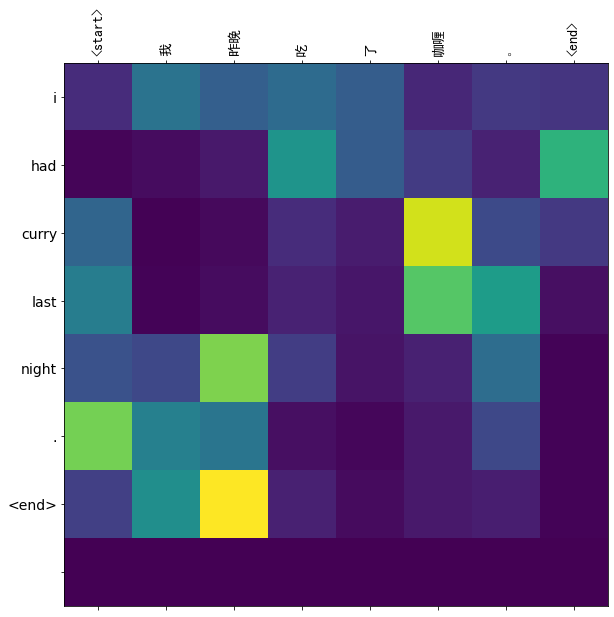

In [ ]:
translate(u'我昨晚吃了咖喱。') # i ate curry last night.

Input: <start> 谢谢 你 的 关注 。 <end>
Predicted translation: thanks for your manners . <end> 


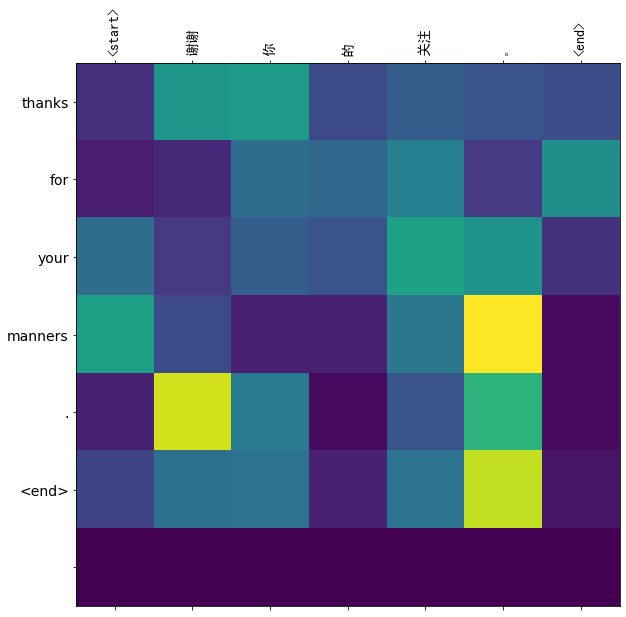

In [ ]:
translate(u'谢谢你的关注。') # thank you for your attention.

Input: <start> 警方 逮捕 了 嫌疑人 。 <end>
Predicted translation: the policeman arrested the suspect . <end> 


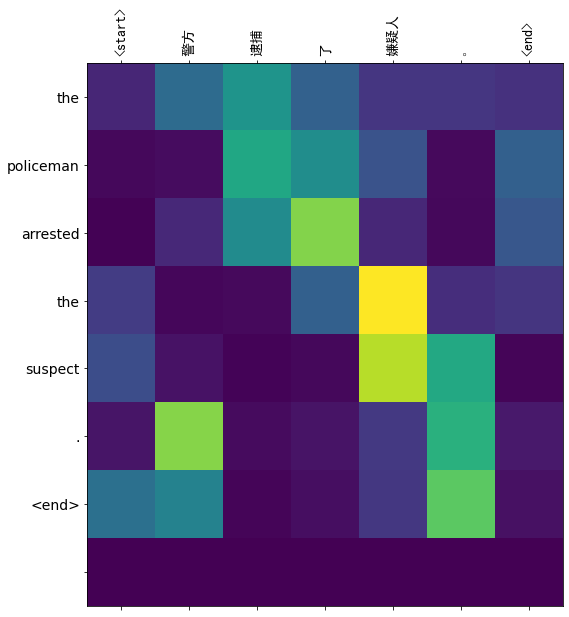

In [ ]:
translate(u'警方逮捕了嫌疑人。') # the police arrested the suspect.

Input: <start> 他 非常 喜欢 棒球 。 <end>
Predicted translation: he likes baseball very much . <end> 


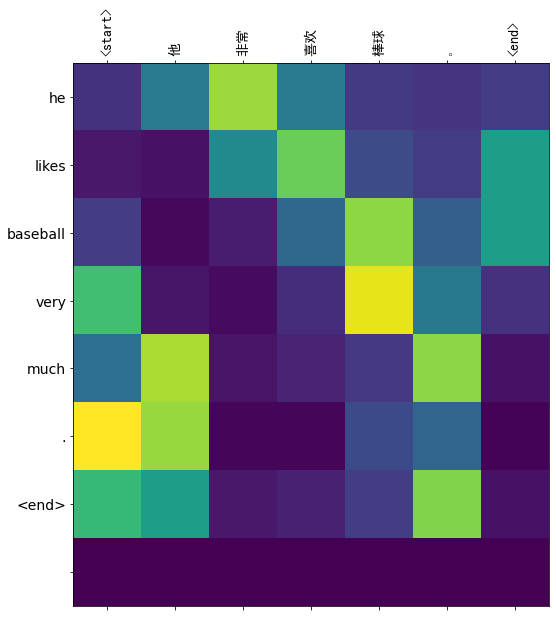

In [ ]:
translate('他非常喜欢棒球。') # he really likes baseball.

Input: <start> 他 看起来 比 他 的 实际 年龄 大 。 <end>
Predicted translation: he looks older than his age . <end> 


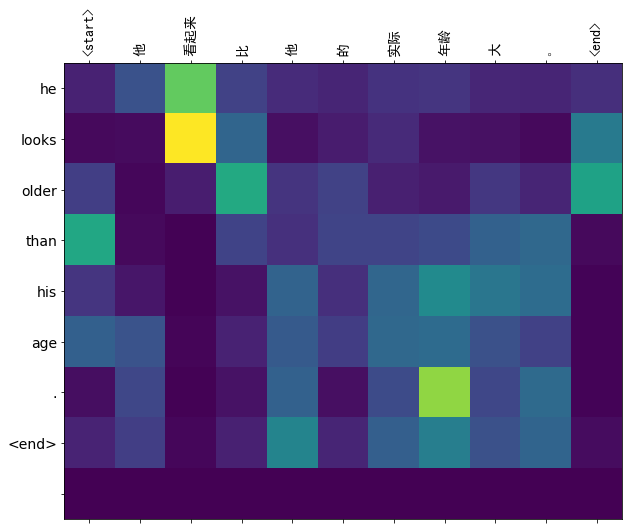

In [ ]:
translate('他看起来比他的实际年龄大。') # he looks old for his age.

Input: <start> 问题 是 我 没什么 要 跟 他 说 的 。 <end>
Predicted translation: the problem is the same . <end> 


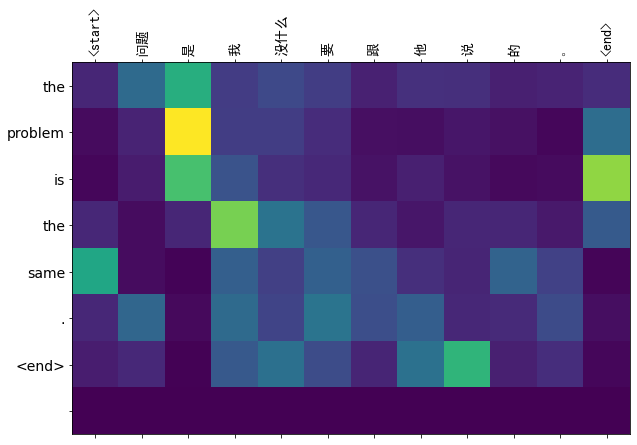

In [ ]:
translate('问题是我没什么要跟他说的。')

Input: <start> 我 父亲 曾经 去过 澳洲 两次 。 <end>
Predicted translation: my father has been to australia . <end> 


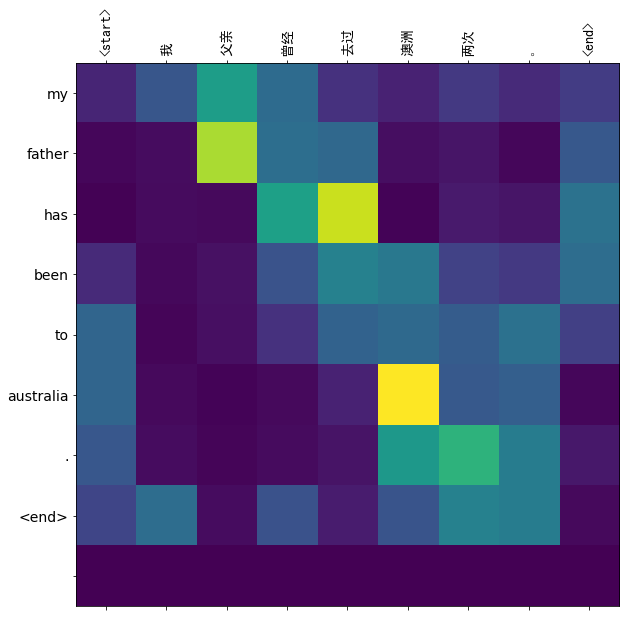

In [ ]:
translate('我父亲曾经去过澳洲两次。') # my father has been to australia twice.

Input: <start> 如果 真的 朋友 的话 ， 是 不会 说 这样的话 把 。 <end>
Predicted translation: if the truth would be like . <end> 


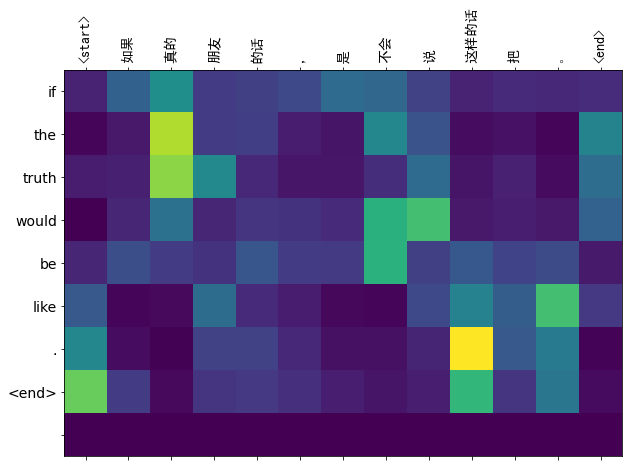

In [ ]:
translate('如果真的朋友的话，是不会说这样的话把。') # a true friend would not say such a thing.

##6-6 bleu를 활용한 모델 번역 정확도 평가

- bleu(Bilingual Evaluation Understudy) : 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법으로, 측정 기준은 n-gram에 기반한다.

In [ ]:
import nltk.translate.bleu_score as bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu
# 출처 : https://machinelearningmastery.com/calculate-bleu-score-for-text-python/ 

In [ ]:
def bleu_score(refer, candidate, ngram=1): 

    smoothie = SmoothingFunction().method7
    if ngram == 1:
        weight = (1, 0, 0, 0)
    elif ngram == 2:
        weight = (0.5, 0.5, 0, 0)
    elif ngram == 3:
        weight = (0.33, 0.33, 0.33, 0)
    elif ngram == 4:
        weight = (0.25, 0.25, 0.25, 0.25)
        
    return sentence_bleu(refer, candidate, 
                         weights=weight, 
                         smoothing_function=smoothie)

### 비교적 번역이 정확한 문장 예시

In [ ]:
reference = ['thank you for your attention.'] # 谢谢你的关注。
reference = [s.split(' ') for s in reference]
candidate = 'thanks for your manners.'.split(' ')

In [ ]:
bleu_score(reference, candidate, ngram=1)

0.6057339423888705

In [ ]:
reference2 = ['my father has been to australia twice.'] # 我父亲曾经去过澳洲两次。
reference2 = [s.split(' ') for s in reference2]
candidate2 = 'my father has been to australia .'.split(' ')

In [ ]:
bleu_score(reference2, candidate2, ngram=4)   

0.9112102370685213

In [ ]:
reference3 = ['i ate curry last night.'] # 我昨晚吃了咖喱。
reference3 = [s.split(' ') for s in reference3]
candidate3 = 'i had curry last night.'.split(' ')   

In [ ]:
bleu_score(reference3, candidate3, ngram=3)  

0.6243168847497332

In [ ]:
reference4 = ['he looks old for his age.'] # 他看起来比他的实际年龄大。
reference4 = [s.split(' ') for s in reference4]
candidate4 = 'he looks older than his age.'.split(' ')  

In [ ]:
bleu_score(reference4, candidate4, ngram=2)  

0.6794009681972043

### 번역이 부정확한 문장 예시

In [ ]:
reference5 = ['a true friend would not say such a thing.'] # 如果真的朋友的话，是不会说这样的话把。 
reference5 = [s.split(' ') for s in reference5]
candidate5 = 'if the truth would be like .'.split(' ')  

In [ ]:
bleu_score(reference5, candidate5, ngram=1)  

0.39223763558217095

#7 프로젝트 결론 및 향후 개선점



## 7-1 프로젝트 결론 

### 0 . Attention is all you need! : 본 프로젝트의 attention 기반 seq2seq 모델을 사용하여 중문-영문 기계어 번역을 진행했다. 프로젝트를 진행하며, 기존의 attention 기능이 결여된 seq2seq 모델의 한계점을 보완하여 attention 알고리즘이 기계어 번역 모델에 어떠한 과정을 통해 성능을 높였는지에 대해 심층적으로 분석하며 이해할 수 있었다.  

### 1. 학습된 모델을 테스트셋 데이터에 적용했을 때, 길이가 짧은 단문에 대해 비교적 높은 bleu 스코어를 확보하여 번역을 잘 수행했다.



##7-2 프로젝트 한계점 

### 1. 양적으로 제한된 데이터셋을 사용하여 프로젝트를 수행했다.

### 2. 구체적으로 문장의 길이가 긴 문장이나 조건절 등이 포함된 복문 같은 경우, 모델의 번역 정확도가 떨어졌다. 

### 3. 사람 이름 혹은 국가 지역 등의 고유 명사 그리고 중국어의 시그니쳐인 사자성어의 뜻을 내포한 타겟 언어 해석이 포함된 단어가 데이터셋에 포함되지 않았기 때문에 좀 더 단어 갯수의 포함 범위가 큰 데이터를 사용하거나 불용어 처리 등의 전처리를 추가적으로 수행할 경우 좀 더 퀄리티 높은 번역 모델이 될 수 있을 것이다. (네이버, 구글 번역기 Respect!)

##7-3 프로젝트 향후 개선점

### 1. Perplexity 등의 추가적인 언어모델 평가 지표를 추가적으로 사용한다.

### 2. Self-Attention 메커니즘 베이스의 Transformer 모델을 통한 번역기 모델을 만들어 성능을 개선시킬 수 있다.

### 3. 기계어 번역 모델을 적용한 심플 웹서비스 구현을 해볼 수 있다.

### 4. 프로젝트에서 사용하지 않았던 다른 국가 언어(한국어 등)를 사용한 기계어 번역 모델을 구축함으로서, NLP 활용 역량을 강화시킬 것이다.

# 8 참고 문헌

- Stanford Neural Machine Translation Systems for Spoken Language Domains (Minh-Thang Luong, Christopher D. Manning ; Computer Science Department, Stanford University, Stanford, CA 94305)

- Sequence to Sequence Learning
with Neural Networks (Ilya Sutskever, Oriol Vinyals, Quoc V. Le)

- Transformer 를 사용한 영한 기계 번역 (천진우, 구자환, 김응모
/성균관대학교 소프트웨어대학 ; 2020 온라인 추계학술발표대회 논문집 제27권 제2호 (2020. 11))

- BLEU: a Method for Automatic Evaluation of Machine Translation (Kishore Papineni, Salim Roukos, Todd Ward, and Wei-Jing Zhu ; IBM T. J. Watson Research Center
Yorktown Heights, NY 10598, USA)

- https://wikidocs.net/73161 (위키독스 딥러닝을 이용한 자연어 처리 입문)

